In [147]:
#Here we are going to read stock related data of 500 companies using web scraping.
#BeautifulSoap is used to parse HTML content.

from bs4 import BeautifulSoup
import requests
import pandas as pd
import numpy as np  
import time
import matplotlib
%matplotlib inline

In [39]:
#This url has details and hyperlinks of all 500 companies
r=requests.get('https://www.moneycontrol.com/india/stockpricequote/')

In [40]:
#We want to view the data in text format
data=r.text

In [41]:
#we can check how this html data actually looks
print data

 <html>
 <head>
 <meta http-equiv="Content-Type" content="text/html; charset=utf-8" />
 <title>Stock Quotes|Company Stock Price quotes|NSE/ BSE Listed Company Stocks|Indian Stock Market</title>
 <meta name="description" content="Get all Indian company stock quotes listed in the share market. NSE/ BSE Listed companies stock price quotes list, top company stock list on Moneycontrol.">
 <meta name="keywords" content="Stock Market Quotes, Company Stock Quotes, Share Market Price & Chart Quotes">
<link rel="canonical" href="http://www.moneycontrol.com/india/stockpricequote/" />
<meta property="og:url" content="http://www.moneycontrol.com/india/stockpricequote/?gclid=EAIaIQobChMI5erwifjw2wIVUY2PCh0J3gbuEAAYASAAEgLF4PD_BwE" />
<meta property="og:title" content="Stock Quotes|Company Stock Price quotes|NSE/ BSE Listed Company Stocks|Indian Stock Market" />
<meta property="og:description" content="Get all Indian company stock quotes listed in the share market. NSE/ BSE Listed companies stock pri

In [42]:
#use soap to parse HTML sp that we can focus on content on web page we actually intend to target.
#here we follow few steps
#1. On the main url right click and select inspect to view source code of webpage.
#Then click on the arrow on top so that we can examine the arrow over each of our 500 links.
#2. Try first company, as we place arrow over it we get its html code highlighted which tells us that its class is bl_12.
#3. so filter the page content below as <a> and class bl_12.

soup=BeautifulSoup(data,'html.parser')

mydivs = soup.findAll("a", {"class": "bl_12"})

In [43]:
#Lets collect all these hyperlinks of all companies

In [44]:
values=[]
for link in mydivs:
    value=link.get('href')
    values.append(value)
    

In [128]:
#create a temp Df
pd.set_option('max_colwidth', 800)
test_df = pd.DataFrame({'LINK': values})
print(test_df.info())    


test_df.shape
test_df.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 502 entries, 0 to 501
Data columns (total 1 columns):
LINK    502 non-null object
dtypes: object(1)
memory usage: 4.0+ KB
None


,LINK
0,javascript:;
1,http://www.moneycontrol.com/india/stockpricequote/diversified/3mindia/MI42
2,http://www.moneycontrol.com/india/stockpricequote/computerssoftware/8kmilessoftwareservices/PMS01
3,http://www.moneycontrol.com/india/stockpricequote/chemicals/aartiindustries/AI45
4,http://www.moneycontrol.com/india/stockpricequote/oildrillingandexploration/abanoffshore/AO04


In [129]:
#Here we are going to collect the information about comapny name,code and sector
#example link is https://www.moneycontrol.com/india/stockpricequote/diversified/3mindia/MI42
#then sector is diversified ,code is MI42,name is 3mindia
#we check for perfect complete links and links like javascript:; are excluded as the split on ("/") 
#will not be an array of 8 parts

codes=[]
sector=[]
name=[]

for index,row in test_df.iterrows():
    temp=  row['LINK'].split('/')
    if len(temp)==8:
        codes.append(temp[-1])
        sector.append(temp[-3])
        name.append(temp[-2])
    else:
        print index

0
501


In [130]:
#so lets drop indexes at 0 and 501
test_df=test_df.drop([0, 501])

test_df.shape


(500, 1)

In [131]:
test_df['sector']=sector
test_df['name']=codes
test_df['code']=name
test_df.head()

,LINK,sector,name,code
1,http://www.moneycontrol.com/india/stockpricequote/diversified/3mindia/MI42,diversified,MI42,3mindia
2,http://www.moneycontrol.com/india/stockpricequote/computerssoftware/8kmilessoftwareservices/PMS01,computerssoftware,PMS01,8kmilessoftwareservices
3,http://www.moneycontrol.com/india/stockpricequote/chemicals/aartiindustries/AI45,chemicals,AI45,aartiindustries
4,http://www.moneycontrol.com/india/stockpricequote/oildrillingandexploration/abanoffshore/AO04,oildrillingandexploration,AO04,abanoffshore
5,http://www.moneycontrol.com/india/stockpricequote/infrastructuregeneral/abbindia/ABB,infrastructuregeneral,ABB,abbindia


In [51]:
#get this result of 500 urls and codes into a csv file
test_df.shape
test_df.to_csv('Initial500CompanyData.csv')

In [52]:
#here I am showing example for one particular link 
# eg https://www.moneycontrol.com/india/stockpricequote/diversified/3mindia/MI42
#we want all imp parameters from this webpage so we identify Standalone properties
#identify tag keys-class as FL gL_10 UC and values-class as FR gD_12
r=requests.get('https://www.moneycontrol.com/india/stockpricequote/diversified/3mindia/MI42')
d=r.text
soup=BeautifulSoup(d,'html.parser')

mydivs = soup.findAll("div", {"class": "FL gL_10 UC"})
myvalues=soup.findAll("div",{"class":"FR gD_12"})

In [53]:
#Lets create our final dataframe to consists of the link and its standalone respective parameters as columns of df.
#(creation of df is in next cell..here we create its columns)

xyz=[]
xyz.append('Link')
for d in mydivs:
    if d.text not in xyz:
        xyz.append(d.text)
   
    
print xyz #to verify the columns got are correct 


['Link', u'MARKET CAP (Rs Cr)', u'P/E', u'BOOK VALUE (Rs)', u'DIV (%)', u'Market Lot', u'INDUSTRY P/E', u'EPS (TTM)', u'P/C', u'PRICE/BOOK', u'DIV YIELD.(%)', u'FACE VALUE (Rs)', u'DELIVERABLES (%)']


In [54]:
#create a Final 
df_final=pd.DataFrame(columns=xyz)
df_final.head()

,Link,MARKET CAP (Rs Cr),P/E,BOOK VALUE (Rs),DIV (%),Market Lot,INDUSTRY P/E,EPS (TTM),P/C,PRICE/BOOK,DIV YIELD.(%),FACE VALUE (Rs),DELIVERABLES (%)


In [85]:
#Now we have to get the values for above columns from each respective webpage of 500 companies.
#Lets first read the df from out previous 'Initial500CompanyData.csv' file to operate over each link there.
temp=pd.read_csv('Initial500CompanyData.csv')
temp.shape
temp.head(5)

,Unnamed: 0,LINK,sector,name,code
0,1,http://www.moneycontrol.com/india/stockpricequote/diversified/3mindia/MI42,3mindia,MI42,diversified
1,2,http://www.moneycontrol.com/india/stockpricequote/computerssoftware/8kmilessoftwareservices/PMS01,8kmilessoftwareservices,PMS01,computerssoftware
2,3,http://www.moneycontrol.com/india/stockpricequote/chemicals/aartiindustries/AI45,aartiindustries,AI45,chemicals
3,4,http://www.moneycontrol.com/india/stockpricequote/oildrillingandexploration/abanoffshore/AO04,abanoffshore,AO04,oildrillingandexploration
4,5,http://www.moneycontrol.com/india/stockpricequote/infrastructuregeneral/abbindia/ABB,abbindia,ABB,infrastructuregeneral


In [86]:
#Here comes the most important step!!!
#YES!!!!!!!!!!! Lets start gathering Data :):):)
#For each link we request to its webpage and get the values using class-tag and store it in our final_dataframe(df_final)
#Here sleep is necessary because we just cant request so many times back to back else server will refuse connection.
#The whole process will take time to about 30 minutes and up...Didn't optimise in this basic web scraping tutorial..

j=0
mylinks=[]

for i in temp['LINK']:
    
    eachvalue=[]
    r=requests.get(i)
    d=r.text
    soup=BeautifulSoup(d,'html.parser')
    myvalues=soup.findAll("div",{"class":"FR gD_12"})
    for v in myvalues:
        eachvalue.append(v.text)
    df_final.loc[j]=[i,eachvalue[0],eachvalue[1],eachvalue[2],eachvalue[3],eachvalue[4],eachvalue[5],eachvalue[6],eachvalue[7],eachvalue[8],eachvalue[9],eachvalue[10],eachvalue[11]]
    j=j+1
    print "Currently scraping for link ",i
    time.sleep(10)
    
    
    
    
print j #Check j count to verify loop running status count...

Currently scraping for link  http://www.moneycontrol.com/india/stockpricequote/diversified/3mindia/MI42
Currently scraping for link  http://www.moneycontrol.com/india/stockpricequote/computerssoftware/8kmilessoftwareservices/PMS01
Currently scraping for link  http://www.moneycontrol.com/india/stockpricequote/chemicals/aartiindustries/AI45
Currently scraping for link  http://www.moneycontrol.com/india/stockpricequote/oildrillingandexploration/abanoffshore/AO04
Currently scraping for link  http://www.moneycontrol.com/india/stockpricequote/infrastructuregeneral/abbindia/ABB
Currently scraping for link  http://www.moneycontrol.com/india/stockpricequote/pharmaceuticals/abbottindia/AI51
Currently scraping for link  http://www.moneycontrol.com/india/stockpricequote/cementmajor/acc/ACC06
Currently scraping for link  http://www.moneycontrol.com/india/stockpricequote/trading/adanienterprises/AE13
Currently scraping for link  http://www.moneycontrol.com/india/stockpricequote/infrastructuregeneral

Currently scraping for link  http://www.moneycontrol.com/india/stockpricequote/plantationsteacoffee/bombayburmahtradingcorporation/BBT
Currently scraping for link  http://www.moneycontrol.com/india/stockpricequote/textilesprocessing/bombaydyeingmanufacturingcompany/BDM
Currently scraping for link  http://www.moneycontrol.com/india/stockpricequote/autoancillaries/bosch/B05
Currently scraping for link  http://www.moneycontrol.com/india/stockpricequote/refineries/bharatpetroleumcorporation/BPC
Currently scraping for link  http://www.moneycontrol.com/india/stockpricequote/foodprocessing/britanniaindustries/BI
Currently scraping for link  http://www.moneycontrol.com/india/stockpricequote/pharmaceuticals/cadilahealthcare/CHC
Currently scraping for link  http://www.moneycontrol.com/india/stockpricequote/financehousing/canfinhomes/CFH
Currently scraping for link  http://www.moneycontrol.com/india/stockpricequote/bankspublicsector/canarabank/CB06
Currently scraping for link  http://www.moneycon

Currently scraping for link  http://www.moneycontrol.com/india/stockpricequote/banksprivatesector/federalbank/FB
Currently scraping for link  http://www.moneycontrol.com/india/stockpricequote/cablestelephone/finolexcables/FC01
Currently scraping for link  http://www.moneycontrol.com/india/stockpricequote/petrochemicals/finolexindustries/FI
Currently scraping for link  http://www.moneycontrol.com/india/stockpricequote/computerssoftwaremediumsmall/firstsourcesolutions/FS07
Currently scraping for link  http://www.moneycontrol.com/india/stockpricequote/autolcvshcvs/forcemotors/FM01
Currently scraping for link  http://www.moneycontrol.com/india/stockpricequote/hospitalsmedicalservices/fortishealthcare/FH
Currently scraping for link  http://www.moneycontrol.com/india/stockpricequote/foodprocessing/futureconsumer/FVI
Currently scraping for link  http://www.moneycontrol.com/india/stockpricequote/retail/futurelifestylefashions/FLF01
Currently scraping for link  http://www.moneycontrol.com/india

Currently scraping for link  http://www.moneycontrol.com/india/stockpricequote/financetermlendinginstitutions/idfc/IDF
Currently scraping for link  http://www.moneycontrol.com/india/stockpricequote/banksprivatesector/idfcbank/IDF01
Currently scraping for link  http://www.moneycontrol.com/india/stockpricequote/financetermlendinginstitutions/ifci/IFC02
Currently scraping for link  http://www.moneycontrol.com/india/stockpricequote/oildrillingandexploration/indraprasthagas/IG04
Currently scraping for link  http://www.moneycontrol.com/india/stockpricequote/financegeneral/iiflholdings/II15
Currently scraping for link  http://www.moneycontrol.com/india/stockpricequote/infrastructuregeneral/ilandfstransportationnetworks/ITN
Currently scraping for link  http://www.moneycontrol.com/india/stockpricequote/cementmajor/indiacements/IC
Currently scraping for link  http://www.moneycontrol.com/india/stockpricequote/financehousing/indiabullshousingfinance/IHF01
Currently scraping for link  http://www.mo

Currently scraping for link  http://www.moneycontrol.com/india/stockpricequote/computerssoftwaremediumsmall/lttechnologyservices/LTS
Currently scraping for link  http://www.moneycontrol.com/india/stockpricequote/glassglassproducts/laopalarg/LOR
Currently scraping for link  http://www.moneycontrol.com/india/stockpricequote/textilesmachinery/lakshmimachineworks/LMW
Currently scraping for link  http://www.moneycontrol.com/india/stockpricequote/banksprivatesector/lakshmivilasbank/LVB
Currently scraping for link  http://www.moneycontrol.com/india/stockpricequote/infrastructuregeneral/larsentoubro/LT
Currently scraping for link  http://www.moneycontrol.com/india/stockpricequote/pharmaceuticals/lauruslabs/LL05
Currently scraping for link  http://www.moneycontrol.com/india/stockpricequote/financehousing/lichousingfinance/LIC
Currently scraping for link  http://www.moneycontrol.com/india/stockpricequote/chemicals/lindeindia/BOC
Currently scraping for link  http://www.moneycontrol.com/india/stoc

Currently scraping for link  http://www.moneycontrol.com/india/stockpricequote/constructioncontractingrealestate/phoenixmills/PM02
Currently scraping for link  http://www.moneycontrol.com/india/stockpricequote/pesticidesagrochemicals/piindustries/PII
Currently scraping for link  http://www.moneycontrol.com/india/stockpricequote/chemicals/pidiliteindustries/PI11
Currently scraping for link  http://www.moneycontrol.com/india/stockpricequote/pharmaceuticals/piramalenterprises/PH05
Currently scraping for link  http://www.moneycontrol.com/india/stockpricequote/bankspublicsector/punjabnationalbank/PNB05
Currently scraping for link  http://www.moneycontrol.com/india/stockpricequote/financehousing/pnbhousingfinance/PHF
Currently scraping for link  http://www.moneycontrol.com/india/stockpricequote/constructioncontractingrealestate/pncinfratech/PI26
Currently scraping for link  http://www.moneycontrol.com/india/stockpricequote/computerssoftware/polarisconsultingservices/PSL01
Currently scraping 

Currently scraping for link  http://www.moneycontrol.com/india/stockpricequote/pharmaceuticals/stridesshasun/SA10
Currently scraping for link  http://www.moneycontrol.com/india/stockpricequote/dyespigments/sudarshanchemicalindustries/SCI08
Currently scraping for link  http://www.moneycontrol.com/india/stockpricequote/pharmaceuticals/sunpharmaceuticalindustries/SPI
Currently scraping for link  http://www.moneycontrol.com/india/stockpricequote/pharmaceuticals/sunpharmaadvancedresearchcompany/SPA
Currently scraping for link  http://www.moneycontrol.com/india/stockpricequote/mediaentertainment/suntvnetwork/STN01
Currently scraping for link  http://www.moneycontrol.com/india/stockpricequote/fasteners/sundramfasteners/SF23
Currently scraping for link  http://www.moneycontrol.com/india/stockpricequote/constructioncontractingrealestate/sunteckrealty/SR05
Currently scraping for link  http://www.moneycontrol.com/india/stockpricequote/plastics/supremeindustries/SI48
Currently scraping for link  h

Currently scraping for link  http://www.moneycontrol.com/india/stockpricequote/textilesweaving/welspunindia/WI03
Currently scraping for link  http://www.moneycontrol.com/india/stockpricequote/hotels/westlifedevelopment/DIC
Currently scraping for link  http://www.moneycontrol.com/india/stockpricequote/consumergoodswhitegoods/whirlpoolindia/WI
Currently scraping for link  http://www.moneycontrol.com/india/stockpricequote/computerssoftware/wipro/W
Currently scraping for link  http://www.moneycontrol.com/india/stockpricequote/pharmaceuticals/wockhardt/W05
Currently scraping for link  http://www.moneycontrol.com/india/stockpricequote/miscellaneous/wonderlaholidays/WH01
Currently scraping for link  http://www.moneycontrol.com/india/stockpricequote/banksprivatesector/yesbank/YB
Currently scraping for link  http://www.moneycontrol.com/india/stockpricequote/mediaentertainment/zeeentertainmententerprises/ZEE
Currently scraping for link  http://www.moneycontrol.com/india/stockpricequote/computers

In [87]:
# IMP******** ->verify that df_final.shape returns (500,13)
#Import this result to csv file
df_final.to_csv('500FilesDataExtractionFinal.csv')

In [174]:
#Lets read our data till now to do further processing
result_f=pd.read_csv('500FilesDataExtractionFinal.csv')
result_f.head(5)
result_f['codes']=codes
result_f['sector']=sector
result_f['name']=name

In [175]:
#Next part is cleaning...Lets Start!!!!
#check duplicates
result_f[result_f.Link.duplicated()]
if result_f.Link.duplicated().sum()==0:
    print  ('No DUPLICATE data of COMPANIES')

No DUPLICATE data of COMPANIES


In [176]:
#Do some replacements to clean data
result_f['DIV (%)'] = result_f['DIV (%)'].str.replace('%','')
result_f['DIV YIELD.(%)']=result_f['DIV YIELD.(%)'].str.replace('%','')
result_f['MARKET CAP (Rs Cr)'] = result_f['MARKET CAP (Rs Cr)'].str.replace(',', '')
result_f=result_f.replace('-', np.NaN)


In [177]:
result_f.head(5)

,Unnamed: 0,Link,MARKET CAP (Rs Cr),P/E,BOOK VALUE (Rs),DIV (%),Market Lot,INDUSTRY P/E,EPS (TTM),P/C,PRICE/BOOK,DIV YIELD.(%),FACE VALUE (Rs),DELIVERABLES (%),codes,sector,name
0,0,http://www.moneycontrol.com/india/stockpricequote/diversified/3mindia/MI42,22493.81,72.44,1364.33,0.00,1,21.68,275.66,63.84,14.64,NaN,10.0,"22,493.81",MI42,diversified,3mindia
1,1,http://www.moneycontrol.com/india/stockpricequote/computerssoftware/8kmilessoftwareservices/PMS01,1547.24,316.88,28.49,0.00,1,21.88,1.60,271.12,17.80,NaN,5.0,"1,547.24",PMS01,computerssoftware,8kmilessoftwareservices
2,2,http://www.moneycontrol.com/india/stockpricequote/chemicals/aartiindustries/AI45,10081.20,31.86,200.01,20.00,1,24.17,38.92,22.29,6.20,0.08,5.0,"10,081.20",AI45,chemicals,aartiindustries
3,3,http://www.moneycontrol.com/india/stockpricequote/oildrillingandexploration/abanoffshore/AO04,671.49,78.27,701.88,0.00,1,11.12,1.47,3.96,0.16,NaN,2.0,671.49,AO04,oildrillingandexploration,abanoffshore
4,4,http://www.moneycontrol.com/india/stockpricequote/infrastructuregeneral/abbindia/ABB,25235.11,58.35,170.21,200.00,1,46.50,20.41,42.74,7.00,0.34,2.0,"25,235.11",ABB,infrastructuregeneral,abbindia


In [178]:
#Observe that there are 90 unique different sectors
len(result_f['sector'].unique())

90

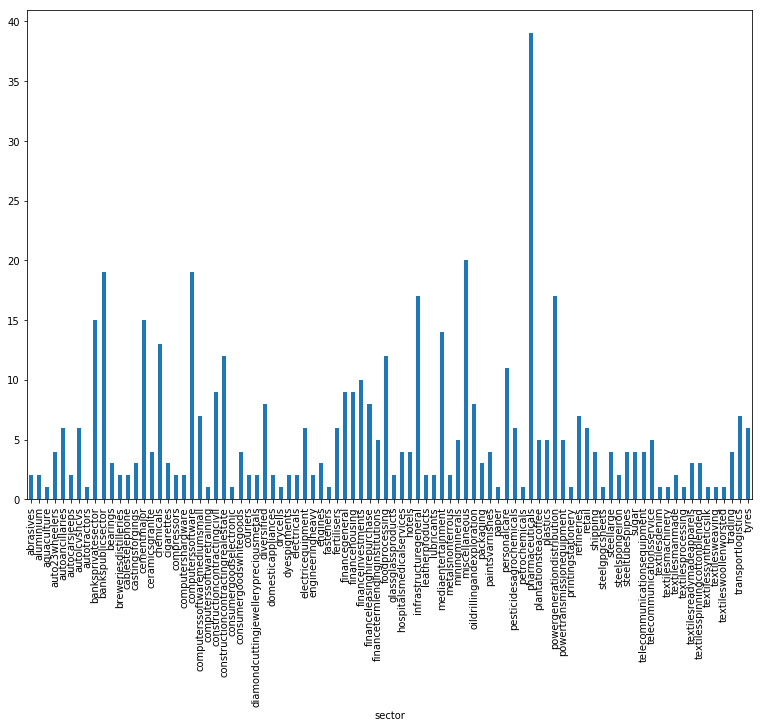

In [179]:
result_f.groupby('sector').size().plot(kind='bar',figsize=(13,9))

In [180]:
#Check the null values overall in each column
result_f.isnull().sum()

Unnamed: 0              0
Link                    0
MARKET CAP (Rs Cr)      0
P/E                    58
BOOK VALUE (Rs)         0
DIV (%)                 0
Market Lot              0
INDUSTRY P/E            0
EPS (TTM)              57
P/C                    48
PRICE/BOOK              6
DIV YIELD.(%)         104
FACE VALUE (Rs)         0
DELIVERABLES (%)        0
codes                   0
sector                  0
name                    0
dtype: int64

In [181]:
#For this task lets think we want to only analyse Market cap and P/E ratio
#so drop rows having them as NaN
result_f=result_f.dropna(subset=['MARKET CAP (Rs Cr)','P/E'], how='any')

In [183]:
result_f.isnull().sum()

Unnamed: 0             0
Link                   0
MARKET CAP (Rs Cr)     0
P/E                    0
BOOK VALUE (Rs)        0
DIV (%)                0
Market Lot             0
INDUSTRY P/E           0
EPS (TTM)              0
P/C                    0
PRICE/BOOK             1
DIV YIELD.(%)         54
FACE VALUE (Rs)        0
DELIVERABLES (%)       0
codes                  0
sector                 0
name                   0
dtype: int64

In [184]:
result_f.shape

(442, 17)

In [185]:
result_f.to_csv('data_442_after_cleaning_analyze.csv')

In [ ]:
#this was some basic webdata scraping and cleaning tutorial...Do check all csv files for results:):):)